# Part 1

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter, defaultdict
import random

from tqdm.notebook import tqdm

In [103]:
PATH_AK = "/content/drive/MyDrive/corpora/AnnaKarenina.txt"
PATH_WAP = "/content/drive/MyDrive/corpora/WarAndPeace.txt"
PATH_WAP_ENG = "/content/drive/MyDrive/corpora/WarAndPeaceEng.txt"

In [104]:
eng_text = []
with open(PATH_WAP_ENG, "r", encoding="utf8") as f:
    eng_text.append(f.read())
eng_text = ' '.join(eng_text)

In [105]:
ru_text = []

with open(PATH_WAP, "r", encoding="utf8") as f:
    ru_text.append(f.read())
with open(PATH_AK, "r", encoding="utf8") as f:
    ru_text.append(f.read())
ru_text = ' '.join(ru_text)

In [106]:
eng_text[:500]

'\ufeffThe Project Gutenberg EBook of War and Peace, by Leo Tolstoy\n\nThis eBook is for the use of anyone anywhere at no cost and with almost\nno restrictions whatsoever.  You may copy it, give it away or re-use it\nunder the terms of the Project Gutenberg License included with this\neBook or online at www.gutenberg.org\n\n\nTitle: War and Peace\n\nAuthor: Leo Tolstoy\n\nTranslators: Louise and Aylmer Maude\n\nPosting Date: January 10, 2009 [EBook #2600]\n\nLast Updated: March 15, 2013\n\nLanguage: English\n\n\n*** START'

* подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);


In [107]:
def clean_punkt_lower(text):
    return re.sub("\W+",' ', text).lower()

eng_text = clean_punkt_lower(eng_text)

In [108]:
eng_text[:500]

' the project gutenberg ebook of war and peace by leo tolstoy this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org title war and peace author leo tolstoy translators louise and aylmer maude posting date january 10 2009 ebook 2600 last updated march 15 2013 language english start of this project gutenberg eb'

In [109]:
count_freq = Counter(eng_text)

count_freq_short = Counter(eng_text).most_common(10)
count_freq_short

[(' ', 576610),
 ('e', 315233),
 ('t', 226406),
 ('a', 205806),
 ('o', 192879),
 ('n', 184173),
 ('i', 174281),
 ('h', 167404),
 ('s', 162891),
 ('r', 148428)]

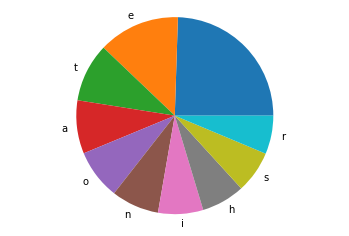

In [110]:
labels = []
sizes = []
for x, y in sorted(count_freq_short,key=lambda item: item[1], reverse=True):
    labels.append(x)
    sizes.append(y)
# Plot
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()

* возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;

In [111]:
test = []
for i in range(600, 1200 + 1, 300):
    test.append(eng_text[-i:])

In [112]:
print(*test, sep='\n')

ject gutenberg tm ebooks are often created from several printed editions all of which are confirmed as public domain in the u s unless a copyright notice is included thus we do not necessarily keep ebooks in compliance with any particular paper edition most people start at our web site which has the main pg search facility http www gutenberg org this web site includes information about project gutenberg tm including how to make donations to the project gutenberg literary archive foundation how to help produce our new ebooks and how to subscribe to our email newsletter to hear about new ebooks 
berg tm electronic works professor michael s hart is the originator of the project gutenberg tm concept of a library of electronic works that could be freely shared with anyone for thirty years he produced and distributed project gutenberg tm ebooks with only a loose network of volunteer support project gutenberg tm ebooks are often created from several printed editions all of which are confirmed

In [113]:
def encode_text(text: str) -> str:
    chars = list(set(text))
    shuffled_chars = chars.copy()
    random.shuffle(shuffled_chars)
    d = dict(zip(chars, shuffled_chars))
    encoded_text = [d[char] for char in text]
    return ''.join(encoded_text)

In [114]:
encoded_test = [encode_text(text) for text in test] 
print(*encoded_test, sep='\n')

jcuwnkhwcbacoknwvncaiirmntocnifwcbnuoctwcdnfoivnmc cotlnpoebwcdncdeweibmntllnifngseusntocnuibfeovcdntmnphaleundivtebnebnwscnhnmnhblcmmntnuipyoekswnbiweucnemnebulhdcdnwshmngcndinbiwnbcucmmtoelynrccpncaiirmnebnuivpletbucngewsntbynptoweuhltonptpconcdeweibnvimwnpciplcnmwtowntwnihongcanmewcngseusnstmnwscnvtebnpknmctousnftuelewynswwpngggnkhwcbacoknioknwsemngcanmewcnebulhdcmnebfiovtweibntaihwnpoijcuwnkhwcbacoknwvnebulhdebknsignwinvtrcndibtweibmnwinwscnpoijcuwnkhwcbacoknlewcotoyntouse cnfihbdtweibnsignwinsclpnpoidhucnihonbcgncaiirmntbdnsignwinmhamuoeacnwinihoncvtelnbcgmlcwwconwinsctontaihwnbcgncaiirmn
iv cegkevuvdg fhpdeaf roew fnvoof ekpdylvueoeyl gepoegyvef pcphlgf efnegyvew fjvdgecmgvhiv cegkedfhdvwgefneleupi l tefnevuvdg fhpdeaf roegylgedfmubeiven vvuteoyl vbeapgyelhtfhvenf egyp gtetvl oeyvew fbmdvbelhbebpog pimgvbew fjvdgecmgvhiv cegkeviffroeapgyefhuteleuffovehvgaf refnesfumhgvv eomwwf gew fjvdgecmgvhiv cegkeviffroel vefngvhed vlgvben fkeovsv luew phgvbevbpgpfhoeluuefneaypdyel vedfhnp kvb

* расшифруйте их таким частотным методом.

In [115]:
def unigramm_decoding(encoded_test, count_freq):
    encoded_cnt = Counter(encoded_test).most_common()
    train_cnt = count_freq.most_common(len(encoded_cnt))
    return dict(zip([item[0] for item in  encoded_cnt], [item [0] for item in  train_cnt]))

In [116]:
def decode_unigram_string(text, count_freq):
    d = unigramm_decoding(text, count_freq)
    decoded = [d[c] for c in text]
    return "".join(decoded)

In [117]:
mapping = []
for i in range(3):
    mapping.append(unigramm_decoding(encoded_test[i],count_freq))
print(*mapping, sep='\n')

{'n': ' ', 'c': 'e', 'w': 't', 'i': 'a', 'e': 'o', 'b': 'n', 'o': 'i', 't': 'h', 'm': 's', 'u': 'r', 'h': 'd', 's': 'l', 'l': 'u', 'p': 'm', 'a': 'c', 'd': 'w', 'g': 'f', 'k': 'g', 'v': 'y', 'f': 'p', 'r': 'b', 'y': 'v', 'j': 'k', ' ': 'x'}
{'e': ' ', 'v': 'e', 'f': 't', 'g': 'a', ' ': 'o', 'p': 'n', 'h': 'i', 'l': 'h', 'o': 's', 'd': 'r', 'y': 'd', 'm': 'l', 'u': 'u', 'w': 'm', 'i': 'c', 'b': 'w', 'a': 'f', 'c': 'g', 'k': 'y', 'n': 'p', 't': 'b', 'r': 'v', 'j': 'k', 's': 'x'}
{'y': ' ', 'p': 'e', 'u': 't', 'j': 'a', 'b': 'o', 'g': 'n', 'd': 'i', ' ': 'h', 'r': 's', 'w': 'r', 't': 'd', 'v': 'l', 'f': 'u', 'h': 'm', 'c': 'c', '5': 'w', 'm': 'f', 'n': 'g', 'k': 'y', 's': 'p', 'l': 'b', 'i': 'v', 'a': 'k', 'o': 'x', 'e': 'j'}


In [118]:
decoded = []
for i in range(3):
    decoded.append(decode_unigram_string(test[i],count_freq))
print(*decoded, sep='\n')

kert gdtenceig ty ecaabs hie apten riehtew piay sexeihu miontew ewotoans huu ap florl hie ranpoiyew hs mdcuor wayhon on tle d s dnuess h ramvioglt natore os onrudwew tlds fe wa nat neresshiouv beem ecaabs on raymuohnre fotl hnv mhitorduhi mhmei ewotoan yast meamue sthit ht adi fec sote florl lhs tle yhon mg sehirl phrouotv lttm fff gdtenceig aig tlos fec sote onrudwes onpaiyhtoan hcadt miakert gdtenceig ty onrudwong laf ta yhbe wanhtoans ta tle miakert gdtenceig uoteihiv hirloxe padnwhtoan laf ta leum miawdre adi nef ecaabs hnw laf ta sdcsrioce ta adi eyhou nefsuettei ta lehi hcadt nef ecaabs 
ceog ay eueraotinr ftovs motpessto ynrdheu s dhoa ns ade tongnihato tp ade motkera glaeiceog ay rtirema tp h uncohob tp eueraotinr ftovs adha rtluw ce poeeub sdhoew fnad hibtie pto adnoab behos de motwlrew hiw wnsaonclaew motkera glaeiceog ay ecttvs fnad tiub h uttse ieaftov tp xtuliaeeo slmmtoa motkera glaeiceog ay ecttvs hoe tpaei roehaew poty sexeohu moniaew ewnantis huu tp fdnrd hoe rtipnoyew

In [119]:
print(*test, sep='\n')

ject gutenberg tm ebooks are often created from several printed editions all of which are confirmed as public domain in the u s unless a copyright notice is included thus we do not necessarily keep ebooks in compliance with any particular paper edition most people start at our web site which has the main pg search facility http www gutenberg org this web site includes information about project gutenberg tm including how to make donations to the project gutenberg literary archive foundation how to help produce our new ebooks and how to subscribe to our email newsletter to hear about new ebooks 
berg tm electronic works professor michael s hart is the originator of the project gutenberg tm concept of a library of electronic works that could be freely shared with anyone for thirty years he produced and distributed project gutenberg tm ebooks with only a loose network of volunteer support project gutenberg tm ebooks are often created from several printed editions all of which are confirmed

In [122]:
def accuracy(y_true, y_pred):
    return round((np.array(list(y_true)) == np.array(list(y_pred))).mean(), 3)

In [123]:
for i in range(3):
    print(accuracy(test[i], decoded[i]))

0.467
0.33
0.447


Максимальный результат - 0.467

# Part 2

In [124]:
def get_bigrams(text):
    return [text[i:i+2] for i in range(len(text) - 1)]

In [125]:
def bigramm_decoding(encoded, train):
    char_cnt = Counter(train).most_common()
    encoded_cnt = Counter(encoded).most_common()
    encoded_bigrams = Counter(get_bigrams(encoded)).most_common()
    decoded_bigrams = Counter(get_bigrams(train)).most_common()
    mapping = {}
    used = set()
    to_decode = set()
    for enc, _ in encoded_bigrams:
        if enc[0] in mapping and enc[1] in mapping:
            continue
        elif enc[0] in mapping:
            mapped = mapping[enc[0]]
            possible = [
                dec for dec, _ in decoded_bigrams 
                if dec[0] == mapped and 
                dec[1] not in used
            ]
            if len(possible) > 1:
                mapping[enc[1]] = possible[0][1]
                used.add(possible[0][1])
            else:
                to_decode.add(enc[1])
        elif enc[1] in mapping:
            mapped = mapping[enc[1]]
            possible = [
                dec for dec, _ in decoded_bigrams
                if dec[1] == mapped and 
                dec[0] not in used
            ]
            if len(possible) > 1:
                mapping[enc[0]] = possible[0][0]
                used.add(possible[0][0])
            else:
                to_decode.add(enc[0])
        else:
            possible = [
                dec for dec, _ in decoded_bigrams 
                if dec[1] not in used and
                dec[0] not in used
            ]
            mapping[enc[0]] = possible[0][0]
            mapping[enc[1]] = possible[0][1]
            
    
    encoded_cnt = [(var, cnt) for var, cnt in encoded_cnt if var in to_decode]
    char_cnt = [(var, cnt) for var, cnt in char_cnt if var not in used]
    for i, (enc, _) in enumerate(encoded_cnt):
        mapping[enc] = char_cnt[i][0]
    return mapping

In [126]:
mapping = []
for i in range(3):
    mapping.append(bigramm_decoding(encoded_test[i],eng_text))
print(*mapping, sep='\n')

{'c': 'e', 'n': ' ', 'm': 'e', 'w': 't', 't': 'a', 'o': 'n', 'e': 'd', 'b': ' ', 'p': 'h', 'k': 'd', 'i': 's', 'g': 'w', 's': 'o', 'h': ' ', 'a': 'r', 'd': 'l', 'u': 'i', 'v': 'm', 'r': 'u', 'l': 'g', 'y': 'y', 'j': 'v', 'f': 'b', ' ': 'c'}
{'v': 'e', 'e': ' ', 'g': 't', 'o': 'e', 'l': 'a', 'w': 'h', ' ': 'n', 'f': 'd', 'h': ' ', 'y': ' ', 'a': 's', 'p': 'd', 'c': 'r', 'b': 'y', 'i': 'l', 'm': 'i', 'd': 'm', 't': 'o', 'r': 'v', 'n': 'u', 'k': 'g', 'u': 'c', 'j': 'j', 's': 'b'}
{'p': 'e', 'y': ' ', 'r': 'e', 'j': ' ', 'g': 't', 'u': 't', 'd': 'a', 'h': 'h', 'b': ' ', ' ': 'i', 't': 'o', 'v': 'd', 'w': 'r', '5': 's', 'n': 'w', 'c': 'n', 'm': 'l', 'k': 'y', 'i': 'm', 'l': 'g', 'f': 'v', 'a': 'b', 's': 'c', 'o': 'f', 'e': 'p'}


In [127]:
def decode_bigramm_string(text, train):
    d = bigramm_decoding(text, train)
    decoded = [d[c] for c in text]
    return "".join(decoded)

In [128]:
decoded = []
for i in range(3):
    decoded.append(decode_bigramm_string(test[i],eng_text))
print(*decoded, sep='\n')

veit d te rend tm erssue ane sbte  ineatel bnsm eecenag hnd tel eldtds e agg sb wodio ane is bdnmel ae h rgdi lsmad  d  toe   e   geee a ishynddot  stdie de d ig lel to e we ls  st  eieeeandgy ueeh erssue d  ismhgda ie wdto a y hantdi gan hahen eldtds  mset heshge etant at s n wer edte wodio oae toe mad  hd eeanio baidgdty otth www d te rend snd tode wer edte d ig lee d bsnmatds  ars t hnsveit d te rend tm d ig ld d osw ts maue ls atds e ts toe hnsveit d te rend gdtenany aniodce bs  latds  osw ts oegh hnsl ie s n  ew erssue a l osw ts e reindre ts s n emadg  ewegetten ts oean ars t  ew erssue 
lenr tg ecemtnd dm sdnve hndueeedn gdm aec e  ant de t e dndrd atdn du t e hndjemt rite lenr tg md meht du a cdlnano du ecemtnd dm sdnve t at mdicy le uneeco e aney sdt  a od e udn t dnto oeane  e hndyimey a y ydetndlitey hndjemt rite lenr tg elddve sdt  d co a cddee  etsdnv du bdci teen eihhdnt hndjemt rite lenr tg elddve ane dute  mneatey undg eebenac hnd tey eydtdd e acc du s dm  ane md udngey

In [129]:
for i in range(3):
    print(accuracy(test[i], decoded[i]))

0.452
0.4
0.499


Максимальный скор - 0.5

# Part 3


In [130]:
def random_swap(decode_chars):
    
    indexes = np.random.choice(np.arange(len(decode_chars)), size=2, replace=False)
    left_id, right_id = indexes
    new_decode = decode_chars[:]
    new_decode[left_id], new_decode[right_id] = new_decode[right_id], new_decode[left_id]
    return new_decode


def calc_proba(bigrams, guess, m, char_to_id):
    total = 0
    for bigram, cnt in bigrams:
        row_id = char_to_id[guess[bigram[0]]]
        col_id = char_to_id[guess[bigram[1]]]
        total += cnt * m[row_id, col_id]
    return total

In [135]:
def get_mcmc_mapping(encoded, train, n_epoches=20, n_iter=5000):
    
    encoded_bigrams = Counter(get_bigrams(encoded)).most_common()
    decoded_bigrams = Counter(get_bigrams(train)).most_common()
    
    encoded_chars = list(set(encoded))
    decoded_chars = list(set(train))

    m = np.ones((len(decoded_chars), len(decoded_chars))) 
    char_to_id = {char: i for i, char in enumerate(decoded_chars)}
    for bigram, cnt in decoded_bigrams:
        row_id = char_to_id[bigram[0]]
        col_id = char_to_id[bigram[1]]
        m[row_id, col_id] += cnt
    
    m /= m.sum()
    m = np.log(m)
    
    probas = []
    mappings = []
    
    for _ in range(n_epoches):
        decoded_chars = list(set(train))
        guess = dict(zip(encoded_chars, decoded_chars))
        previous_proba = calc_proba(encoded_bigrams, guess, m, char_to_id)
        for i in range(n_iter):
            new_decoded_chars = random_swap(decoded_chars)
            new_guess = dict(zip(encoded_chars, new_decoded_chars))
            new_proba = calc_proba(encoded_bigrams, new_guess, m, char_to_id)
            if new_proba > previous_proba:
                decoded_chars = new_decoded_chars
                previous_proba = new_proba
                guess = new_guess
            elif np.exp(new_proba - previous_proba) > np.random.rand():
                decoded_chars = new_decoded_chars
                previous_proba = new_proba
                guess = new_guess
        probas.append(previous_proba)
        mappings.append(guess)
    best_index = np.argmax(probas)
    return mappings[best_index]


In [136]:
mapping = []
for i in range(3):
    mapping.append(get_mcmc_mapping(encoded_test[i],eng_text))
print(*mapping, sep='\n')

{'c': 'e', ' ': 'x', 'n': ' ', 'l': 'l', 'u': 'c', 'j': 'k', 'y': 'y', 'm': 's', 'p': 'p', 'v': 'm', 'b': 'n', 'f': 'b', 's': 'h', 'w': 't', 'i': 'o', 'd': 'f', 'g': 'w', 'h': 'u', 'a': 'd', 't': 'a', 'e': 'i', 'o': 'r', 'k': 'g', 'r': 'v'}
{'c': 'g', ' ': 'r', 'n': 'f', 'l': 'a', 'u': 'l', 'y': 'h', 'j': 'b', 'm': 'u', 'p': 'i', 'v': 'e', 'b': 'd', 'f': 'o', 's': 'z', 'w': 'p', 'i': 'v', 'd': 'c', 'g': 't', 'h': 'n', 'a': 'w', 't': 'y', 'e': ' ', 'o': 's', 'k': 'm', 'r': 'k'}
{'c': 'u', ' ': 'i', 'n': 'w', 'l': 'y', 'u': 't', 'y': ' ', 'j': 'o', 'm': 'b', 'p': 'e', 'v': 'd', 'b': 'r', 'f': 'l', 's': 'm', 'w': 'c', 'i': 'k', 'd': 'a', 'g': 'n', 'h': 'p', 'a': 'v', 't': 'h', 'e': 'x', 'o': 'z', '5': 'g', 'k': 'f', 'r': 's'}


In [145]:
def decode_mcmc_string(text, train,  n_epoches=20, n_iter=5000):
    d = get_mcmc_mapping(text, train, n_epoches, n_iter)
    decoded = [d[c] for c in text]
    return "".join(decoded)

In [138]:
decoded = []
for i in range(3):
    decoded.append(decode_mcmc_string(test[i],eng_text))
print(*decoded, sep='\n')

kect gutenderg tm edoovs are obten createf brom sexeral printef efitions all ob which are conbirmef as pudlic fomain in the u s unless a copyright notice is inclufef thus we fo not necessarily veep edoovs in compliance with any particular paper efition most people start at our wed site which has the main pg search bacility http www gutenderg org this wed site inclufes inbormation adout prokect gutenderg tm inclufing how to mave fonations to the prokect gutenderg literary archixe bounfation how to help profuce our new edoovs anf how to sudscride to our email newsletter to hear adout new edoovs 
verg tm electronic works professor michael s hart is the originator of the probect gutenverg tm concept of a livrary of electronic works that could ve freely shared with anyone for thirty years he produced and distrivuted probect gutenverg tm evooks with only a loose network of zolunteer support probect gutenverg tm evooks are often created from sezeral printed editions all of which are confirmed

In [139]:
for i in range(3):
    print(accuracy(test[i], decoded[i]))

0.92
0.967
0.968


# Part 4

In [140]:
encoded = "დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨ" \
           "ჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣს" \
           "ჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ"

In [146]:
decoded = decode_mcmc_string(encoded, ru_text, 50, 50000)

In [147]:
decoded

'если вя вимите норжальня, или почти норжальня, текст у этого соодшени. которя, легко прочитать скорее всего вя все смелали правильно и получите жаксижальня, далл за послемнее четвертое замание курса хот. конечно . ничего не одешаф'